# <div style='color:gray'>Find Upstream Areas in Southern California</div>

In [1]:
%matplotlib inline
import numpy
from scipy import ndimage
import matplotlib.pyplot as plt
import matplotlib.colors as mcolor

import watershed

## Load the raw data

<matplotlib.colorbar.Colorbar instance at 0x000000000A5D3A48>

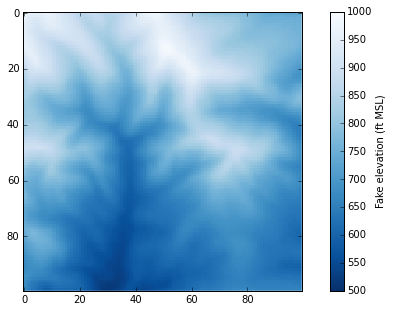

In [2]:
socal = watershed.load_example('so_cal')[150:250, 200:300] * 1000
fig, ax = plt.subplots(figsize=(10,5))
img = ax.imshow(socal, interpolation='none', cmap=plt.cm.Blues_r, vmin=500, vmax=1000)
fig.colorbar(img, label='Fake elevation (ft MSL)')

## The vertical resolution of this dataset isn't very good, so there are many adjacent cells with equal elevations, ending the upstream trace prematurely

<matplotlib.colorbar.Colorbar instance at 0x000000000AA72188>

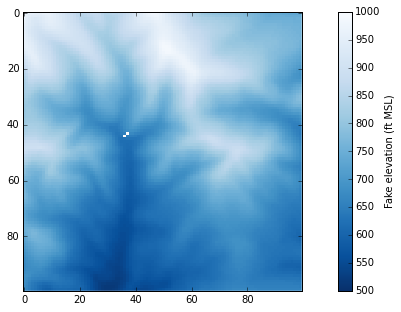

In [3]:
us_mask = watershed.mask_topo(socal, 44, 36, mask_upstream=True)

fig, ax1 = plt.subplots(figsize=(13, 5))
img = ax1.imshow(us_mask, interpolation='none', cmap=plt.cm.Blues_r, vmin=500, vmax=1000)
fig.colorbar(img, label='Fake elevation (ft MSL)')

In the figure above, the upstream trace didn't get very far before it encountered a "flat" area and stopped. We can effectively expand the search radius of the upstream tracer with the `zoom_factor` argument. Let's try a few at the same time:

<matplotlib.colorbar.Colorbar instance at 0x000000001291BEC8>

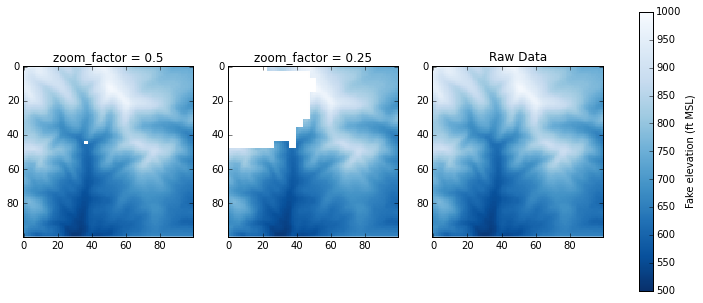

In [4]:
z1_mask = watershed.mask_topo(socal, 44, 36, zoom_factor=0.500, mask_upstream=True)
z2_mask = watershed.mask_topo(socal, 44, 36, zoom_factor=0.250, mask_upstream=True)


fig, (ax1, ax2, ax3) = plt.subplots(figsize=(13, 5), ncols=3)
ax1.set_title('zoom_factor = 0.5')
ax2.set_title('zoom_factor = 0.25')
ax3.set_title('Raw Data')

img1 = ax1.imshow(z1_mask, interpolation='none', cmap=plt.cm.Blues_r, vmin=500, vmax=1000)
img2 = ax2.imshow(z2_mask, interpolation='none', cmap=plt.cm.Blues_r, vmin=500, vmax=1000)
img3 = ax3.imshow(socal, interpolation='none', cmap=plt.cm.Blues_r, vmin=500, vmax=1000)
fig.colorbar(img1, ax=(ax1, ax2, ax3), label='Fake elevation (ft MSL)')

I'm not saying that with `zoom_factor = 0.25`, the defined upstream area is perfect, but it is a great improvement. 

## Mask out the upstream, and non-upstream areas (separately)

<matplotlib.colorbar.Colorbar instance at 0x0000000012F28E48>

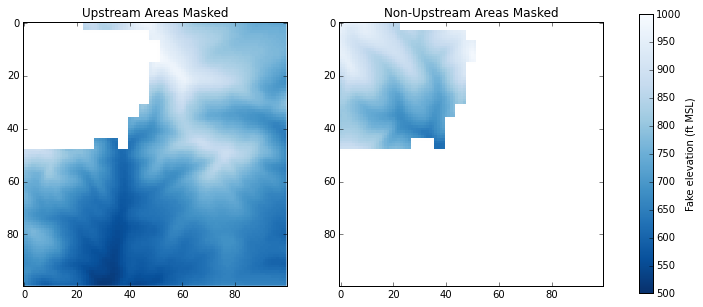

In [5]:
us_mask = watershed.mask_topo(socal, 44, 36, zoom_factor=0.25, mask_upstream=True)
other_mask = watershed.mask_topo(socal, 44, 36, zoom_factor=0.25, mask_upstream=False)


fig, (ax1, ax2) = plt.subplots(figsize=(13, 5), ncols=2)
ax1.set_title('Upstream Areas Masked')
ax2.set_title('Non-Upstream Areas Masked')

img1 = ax1.imshow(us_mask, interpolation='none', cmap=plt.cm.Blues_r, vmin=500, vmax=1000)
img2 = ax2.imshow(other_mask, interpolation='none', cmap=plt.cm.Blues_r, vmin=500, vmax=1000)
fig.colorbar(img1, ax=(ax1, ax2), label='Fake elevation (ft MSL)')